### Exercise: Symbol operation used to optimize the algorithms to reduce CPU, GPU and memory use  

In [1]:
# Import the lib 
import mxnet as mx 

In [2]:
# Define the symbol and its operation  
a = mx.sym.Variable('a')
b = mx.sym.Variable('b')
c = a*a + b/2
(a, b, c) 

(<Symbol a>, <Symbol b>, <Symbol _plus0>)

In [6]:
#Infer the symbol shape 
arg_name = c.list_arguments()  # get the names of the inputs
out_name = c.list_outputs()    # get the names of the outputs
arg_shape, out_shape, _ = c.infer_shape(a=(2,3), b=(2,3))  
{'input' : dict(zip(arg_name, arg_shape)), 
 'output' : dict(zip(out_name, out_shape))}

{'input': {'a': (2L, 3L), 'b': (2L, 3L)},
 'output': {'_plus0_output': (2L, 3L)}}

In [7]:
# Bind with Data and Evaluate the values 
ex = c.bind(ctx=mx.cpu(), args={'a' : mx.nd.array([[2,3,1],[0,90,2]]), 
                                'b' : mx.nd.ones([2,3])})
ex.forward()
ex.outputs[0].asnumpy()


array([[  4.50000000e+00,   9.50000000e+00,   1.50000000e+00],
       [  5.00000000e-01,   8.10050000e+03,   4.50000000e+00]], dtype=float32)

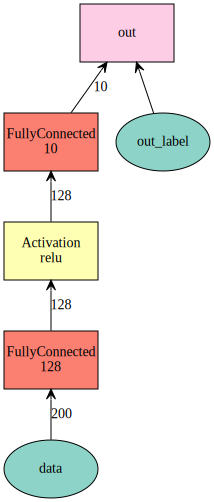

In [8]:
# Define a NN even without data 
net = mx.sym.Variable('data')
net = mx.sym.FullyConnected(data=net, name='fc1', num_hidden=128)
net = mx.sym.Activation(data=net, name='relu1', act_type="relu")
net = mx.sym.FullyConnected(data=net, name='fc2', num_hidden=10)
net = mx.sym.SoftmaxOutput(data=net, name='out')
mx.viz.plot_network(net, shape={'data':(100,200)}) # visualization 